# VGG16 Fine-Tuned+Softmax

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


Using TensorFlow backend.


In [3]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import numpy
import tensorflow as tf
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from numpy import argmax
import numpy as np
from numpy.random import RandomState
np.random.seed(1)
#from sklearn.manifold import TSNE
from sklearn.preprocessing import label_binarize
from keras.utils import to_categorical



from tsne import bh_sne
#from tsne.bh_sne import BH_SNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import os.path
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

In [4]:
import os
import os.path
import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
#from PIL import Image
from keras.preprocessing import image


from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

In [5]:
tf.__version__

'1.9.0'

In [6]:
import time
tic = time.time();

X = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/DatasetX.npy")
y = np.load("/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Datasety.npy")
print(X.shape)
print(y.shape)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/list_fams.pkl', 'rb')
list_fams = pickle.load(file)
file.close()
len(list_fams)


toc = time.time();
print ("Elasped Time (s) = ", toc-tic);


(9339, 224, 224, 3)
(9339,)
Elasped Time (s) =  12.115686893463135


In [7]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

y = to_categorical(y)

X = numpy.array(X)
y = numpy.array(y)
X.shape

(9339, 224, 224, 3)

In [8]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_shape=(224,224,3), classes=1000)
#model.summary()

In [9]:
transfer_layer = model.get_layer('fc2')

x=Dense(25, activation='softmax')(transfer_layer.output)
CNN = Model(inputs=model.input,
                   outputs=x)
#CNN.summary()

In [10]:
tic = time.time();


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.301, random_state=42)

toc = time.time();
print ("Elasped Time (s) = ", toc-tic);

Elasped Time (s) =  11.572436809539795


In [11]:
y_test.shape

(2812, 25)

In [12]:
datagen = ImageDataGenerator()

In [13]:
batch_size = 32
generator_train = datagen.flow(X_train, y_train, batch_size=batch_size)
steps_train = generator_train.n/ batch_size
#cls_train = generator_train.classes
#print("Labels of samples as integer\n\n",cls_train)

In [14]:
generator_test = datagen.flow(X_test, y_test, batch_size=batch_size)
steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

Steps for Test

 87.875


In [15]:
sgd = SGD(lr=0.001, decay=0.01, momentum=0.9)

CNN.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
%time
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

filepath = 'Malimg-fine-tuned.hdf5'

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(filepath,
                            save_best_only=True, #True
                            monitor='val_acc',
                            verbose=1)

history = CNN.fit_generator(generator_train,
                                epochs=50,
                                steps_per_epoch=steps_train,
                                callbacks=[tbCallBack],#checkpoint,
                                validation_data=generator_test,
                                validation_steps=steps_test
                                )

CPU times: user 2 µs, sys: 4 µs, total: 6 µs
Wall time: 14.1 µs
Epoch 1/50
204/203 [==============================] - 71s 347ms/step - loss: 13.0244 - acc: 0.1730 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 2/50
204/203 [==============================] - 65s 320ms/step - loss: 13.3223 - acc: 0.1735 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 3/50
204/203 [==============================] - 66s 323ms/step - loss: 13.3227 - acc: 0.1734 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 4/50
204/203 [==============================] - 66s 323ms/step - loss: 13.3228 - acc: 0.1734 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 5/50
204/203 [==============================] - 67s 326ms/step - loss: 13.3230 - acc: 0.1734 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 6/50
204/203 [==============================] - 65s 320ms/step - loss: 13.3228 - acc: 0.1734 - val_loss: 13.4872 - val_acc: 0.1632
Epoch 7/50
204/203 [==============================] - 66s 322ms/step - loss: 13.3229 - acc: 0.1734 - val_loss: 13.

In [14]:
CNN.save("VGG16-FT-Model.h5")

In [15]:
#####################################
# write Traning History to a file
output = open('VGG16-FT-Softmax-history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()
#####################################

In [16]:
scores = CNN.evaluate_generator(generator_test, verbose=1)
print("%s: %.2f%%" % (CNN.metrics_names[1], scores[1]*100))

1/1 [==============================] - 1s 741ms/step
acc: 82.76%


In [17]:
# read Traning History back from the file
pkl_file = open('VGG16-FT-Softmax-history.pkl', 'rb')
history = pickle.load(pkl_file)
pkl_file.close()

In [13]:
%time
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

filepath = 'Malimg-fine-tuned.hdf5'

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(filepath,
                            save_best_only=True, #True
                            monitor='val_acc',
                            verbose=1)

history = CNN.fit_generator(generator=generator_train,
                                epochs=50,
                                steps_per_epoch=steps_train,
                                callbacks=[tbCallBack],#checkpoint,
                                validation_data=generator_test,
                                validation_steps=steps_test
                                )

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 12.6 µs
Epoch 1/50
3/2 [==========================================] - 10s 3s/step - loss: 2.9764 - acc: 0.2686 - val_loss: 2.1393 - val_acc: 0.4655
Epoch 2/50
3/2 [==========================================] - 1s 490ms/step - loss: 1.6311 - acc: 0.4627 - val_loss: 2.2160 - val_acc: 0.4483
Epoch 3/50
3/2 [==========================================] - 2s 725ms/step - loss: 1.8432 - acc: 0.4423 - val_loss: 1.6915 - val_acc: 0.3448
Epoch 4/50
3/2 [==========================================] - 2s 767ms/step - loss: 1.4385 - acc: 0.4050 - val_loss: 1.9553 - val_acc: 0.4138
Epoch 5/50
3/2 [==========================================] - 2s 670ms/step - loss: 1.8219 - acc: 0.3264 - val_loss: 1.2090 - val_acc: 0.3793
Epoch 6/50
3/2 [==========================================] - 2s 623ms/step - loss: 1.3335 - acc: 0.2975 - val_loss: 0.9819 - val_acc: 0.6207
Epoch 7/50
3/2 [==========================================] - 2s 701ms/step - loss: 0.

In [18]:
from keras.models import load_model
CNN = load_model("VGG16-FT-Model.h5")
#CNN.summary()

In [19]:
scores = CNN.evaluate_generator(generator_test, verbose=1)
print("%s: %.2f%%" % (CNN.metrics_names[1], scores[1]*100))

1/1 [==============================] - 1s 1s/step
acc: 82.76%


In [20]:
cls_pred = CNN.predict_generator(generator_test, verbose=1)

1/1 [==============================] - 2s 2s/step


In [21]:
cls_pred = np.argmax(cls_pred, axis=1)
print(cls_pred)

[2 3 0 0 2 2 0 0 0 0 3 3 1 3 3 3 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [22]:
file = open('VGG16-FT+Softmax(pred).pkl', 'wb')
pickle.dump(cls_pred, file)
file.close()

In [23]:
from pycm import ConfusionMatrix
CM_VGG16_FT_Softmax = ConfusionMatrix(cls_test,cls_pred)
file = open('CM_VGG16_FT_Softmax_.pkl', 'wb')
pickle.dump(CM_VGG16_FT_Softmax, file)
file.close()

In [24]:
file = open('CM_VGG16_FT_Softmax_.pkl', 'rb')
CM_VGG16_FT_Softmax = pickle.load(file)
file.close()
CM_VGG16_FT_Softmax

pycm.ConfusionMatrix(classes: ['0', '1', '2', '3'])

In [25]:
list_fams = list(generator_train.class_indices.keys())
list_fams

['Phobi', 'Phobi-Packed', 'Tesla', 'Tesla-Packed']

In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(cls_test,cls_pred))  
print(classification_report(cls_test,cls_pred,target_names=list_fams)) 

              precision    recall  f1-score   support

       Phobi       0.86      0.60      0.71        10
Phobi-Packed       1.00      0.40      0.57        10
       Tesla       0.86      1.00      0.92        18
Tesla-Packed       0.77      1.00      0.87        20

    accuracy                           0.83        58
   macro avg       0.87      0.75      0.77        58
weighted avg       0.85      0.83      0.81        58



In [27]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
Y_pred = cls_pred

# one hot encode
Y_pred = to_categorical(Y_pred)
print(Y_pred.shape)
# invert encoding
#inverted = argmax(encoded[0])
#print(inverted)


from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
Y_test = cls_test

# one hot encode
Y_test = to_categorical(Y_test)
print(Y_test.shape)
# invert encoding
#inverted = argmax(encoded[0])
#print(inverted)

(58, 4)
(58, 4)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

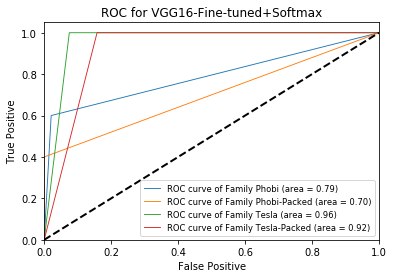

In [29]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 4

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
#plt.figure()
#plt.figure(figsize = (25,9))

#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', marker=11, linewidth=1)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', marker=5, linewidth=1)


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,25)]  

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], lw=0.9,
             label='ROC curve of Family {0} (area = {1:0.2f})'
             ''.format(list_fams[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC for VGG16-Fine-tuned+Softmax')
plt.legend(loc="lower right", fontsize='small')
plt.savefig('Receiver Operating Characteristic for VGG16-FT+Softmax.png', transparent=True)
plt.show()

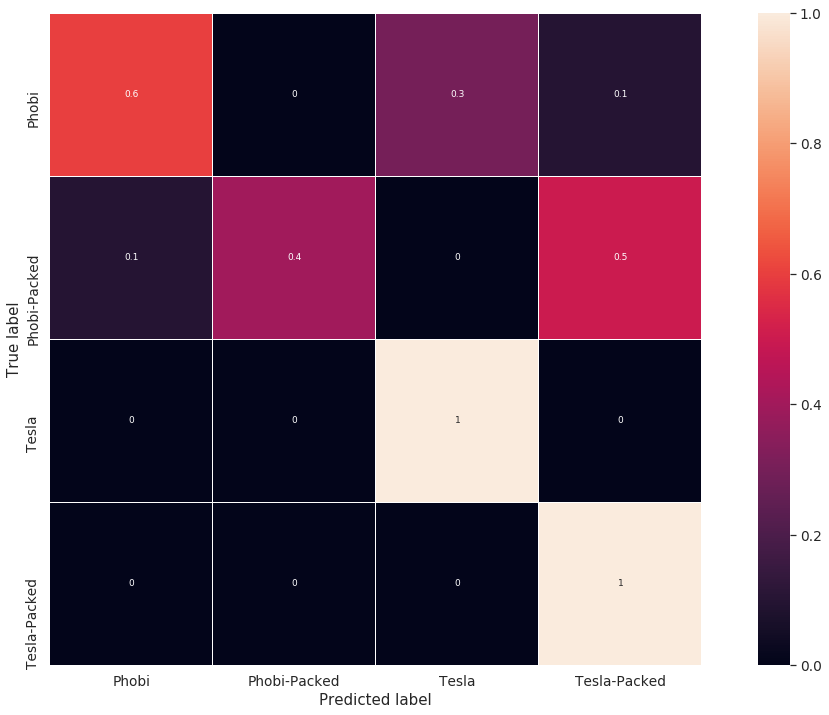

In [30]:
def plot_confusion_matrix(cls_pred):
    
    cls_true = generator_test.classes
    
    cm = confusion_matrix(y_true=cls_test, y_pred=cls_pred)
    
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    figure = plt.gcf()
    figure.set_size_inches(20, 12)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 annot_kws={'size': 9}, linewidth = 0.1,
                 yticklabels=list_fams, xticklabels=list_fams)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('VGG16-Fine-tuned-softmax-Confusion-matrix(loss=SGD).png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix(cls_pred=cls_pred)

In [31]:
CM_VGG16_FT_Softmax.ACC

{'0': 0.9137931034482759,
 '1': 0.896551724137931,
 '2': 0.9482758620689655,
 '3': 0.896551724137931}